# Zomato Analysis

### Introduction

The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the aggregate rating of each restaurant, establishment of different types of restaurant at different places, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world. With each day new restaurants opening the industry has’nt been saturated yet and the demand is increasing day by day. Inspite of increasing demand it however has become difficult for new restaurants to compete with established restaurants. Most of them serving the same food. Bengaluru being an IT capital of India. Most of the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves. With such an overwhelming demand of restaurants it has therefore become important to study the demography of a location. What kind of a food is more popular in a locality. Do the entire locality loves vegetarian food. If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are mostly vegetarian. These kind of analysis can be done using the data, by studying different factors.

### Problem Statement : 
In this challenge, we are analysing the Zomato Restaurant dataset to find the more insights about the Restaurant business.

### Data Description :

url : contains the url of the restaurant in the zomato website

address : contains the address of the restaurant in Bengaluru

name : contains the name of the restaurant

online_order : whether online ordering is available in the restaurant or not

book_table : table book option available or not

rate : contains the overall rating of the restaurant out of 5

votes : contains total number of rating for the restaurant as of the above mentioned date

phone : contains the phone number of the restaurant

location : contains the neighborhood in which the restaurant is located

rest_type : restaurant type

dish_liked : dishes people liked in the restaurant

cuisines : food styles, separated by comma

approx_cost(for two people) : contains the approximate cost for meal for two people

reviews_list : list of tuples containing reviews for the restaurant, each tuple consists of two values, rating and review by the customer

menu_item : contains list of menus available in the restaurant

listed_in(type) : type of meal

listed_in(city) : contains the neighborhood in which the restaurant is listed

### Real-world/Business Objectives and Constraints :

The cost of a mis-classification can be high.

No strict latency concerns.

It will help everyone to unterstand the insights of a restaurant business.

## Breakdown of this notebook:
1.**Loading the dataset:**  Load the data and import the libraries.

2.**Data Cleaning:**
- Deleting redundant columns.
- Renaming the columns.
- Dropping duplicates.
- Cleaning individual columns.
3.**Data Visualization:** Using plots to find relations between the features.

4.**Finding the best cheap restaurants:**
- Cheapest, Highest rated and largely voted.
- Is there a relation between cuisine,location and the cost?
5.**Exploring the best expensive restaurants.**
- Restaurants that are expensive, Highest rated and largely voted.
- Is there a relation between restaurant type,location and the cost?

### Importing Libraries

In [30]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 5);
sns.set_style('whitegrid')
import matplotlib.colors as mcolors

!pip install geopandas
import geopandas as gpd
import folium
from folium.plugins import HeatMap

import os
import plotly.express as px 
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=False)
from geopy.geocoders import Nominatim

! pip install dexplot
import dexplot as dxp

import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#from wordcloud import WordCloud
#from nltk.tokenize import sent_tokenize, word_tokenize
#from nltk.util import ngrams
#from sklearn.feature_extraction.text import CountVectorizer


from tqdm import tqdm


Output hidden; open in https://colab.research.google.com to view.

### Mounting the GDrive

In [31]:
from google.colab import drive
drive.mount('/content/drive')
#drive.mount("/content/drive", force_remount=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


First, we are given some varibale explanations.

### Exploratory Data Analysis
We are given a huge amount of data for customers' orders, locations of a restaurants. Let us see what insights we might from it

Files attached are realy vast, let's pick just a sample of those for performance and basic analysis.

Reading the data

In [32]:
df = pd.read_csv('/content/drive/My Drive/Machine Learning Projects/Regression/Zomato Restaurant Analysis/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [33]:
# getting info abt the 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [34]:
# Checking for the null values
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [35]:
# Let's see the null values of the above dataset in terms of the percentage 

print("Checking the Null or na percentage")
((df.isnull() | df.isna()).sum()*100 / df.index.size)

Checking the Null or na percentage


url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [36]:
# More info about the data

df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [37]:
# Getting the shape of the data
df.shape

(51717, 17)

So the dataset has 51717 rows and 17 columns out of which all columns are not useful so we may have to delete the some of the columns 



In [38]:
df['menu_item'].unique()

array(['[]',
       "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'Chees

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Restaurants provides Table Booking or Not')

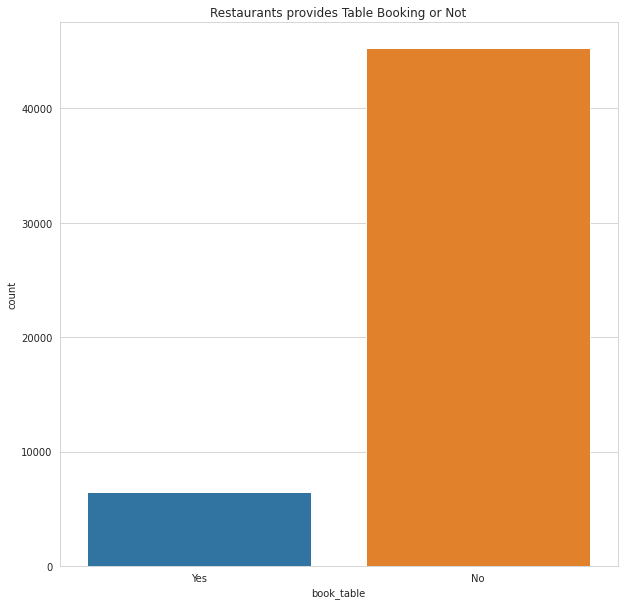

In [39]:
# Plot of the Restaurant that provides Table Booking or Not
sns.countplot(df['book_table'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants provides Table Booking or Not')

From the above plot we can a large portion of the Restaurant don't provide Booking Facility and to be more precise its 87.5%

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Restaurants delivering online or Not')

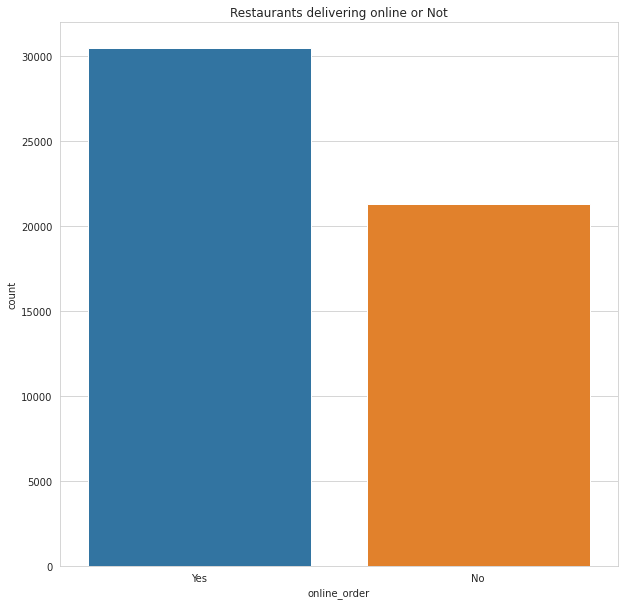

In [40]:
# Plot of the Restaurant, whether they are accepting the online_order or not
sns.countplot(df['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')



```
# This is formatted as code
```

The above Plot  indicates that a large segments of the Restaurant are beyond the rich of Digitisation and are not having online order facility

In [41]:
# Type of the Meals

df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

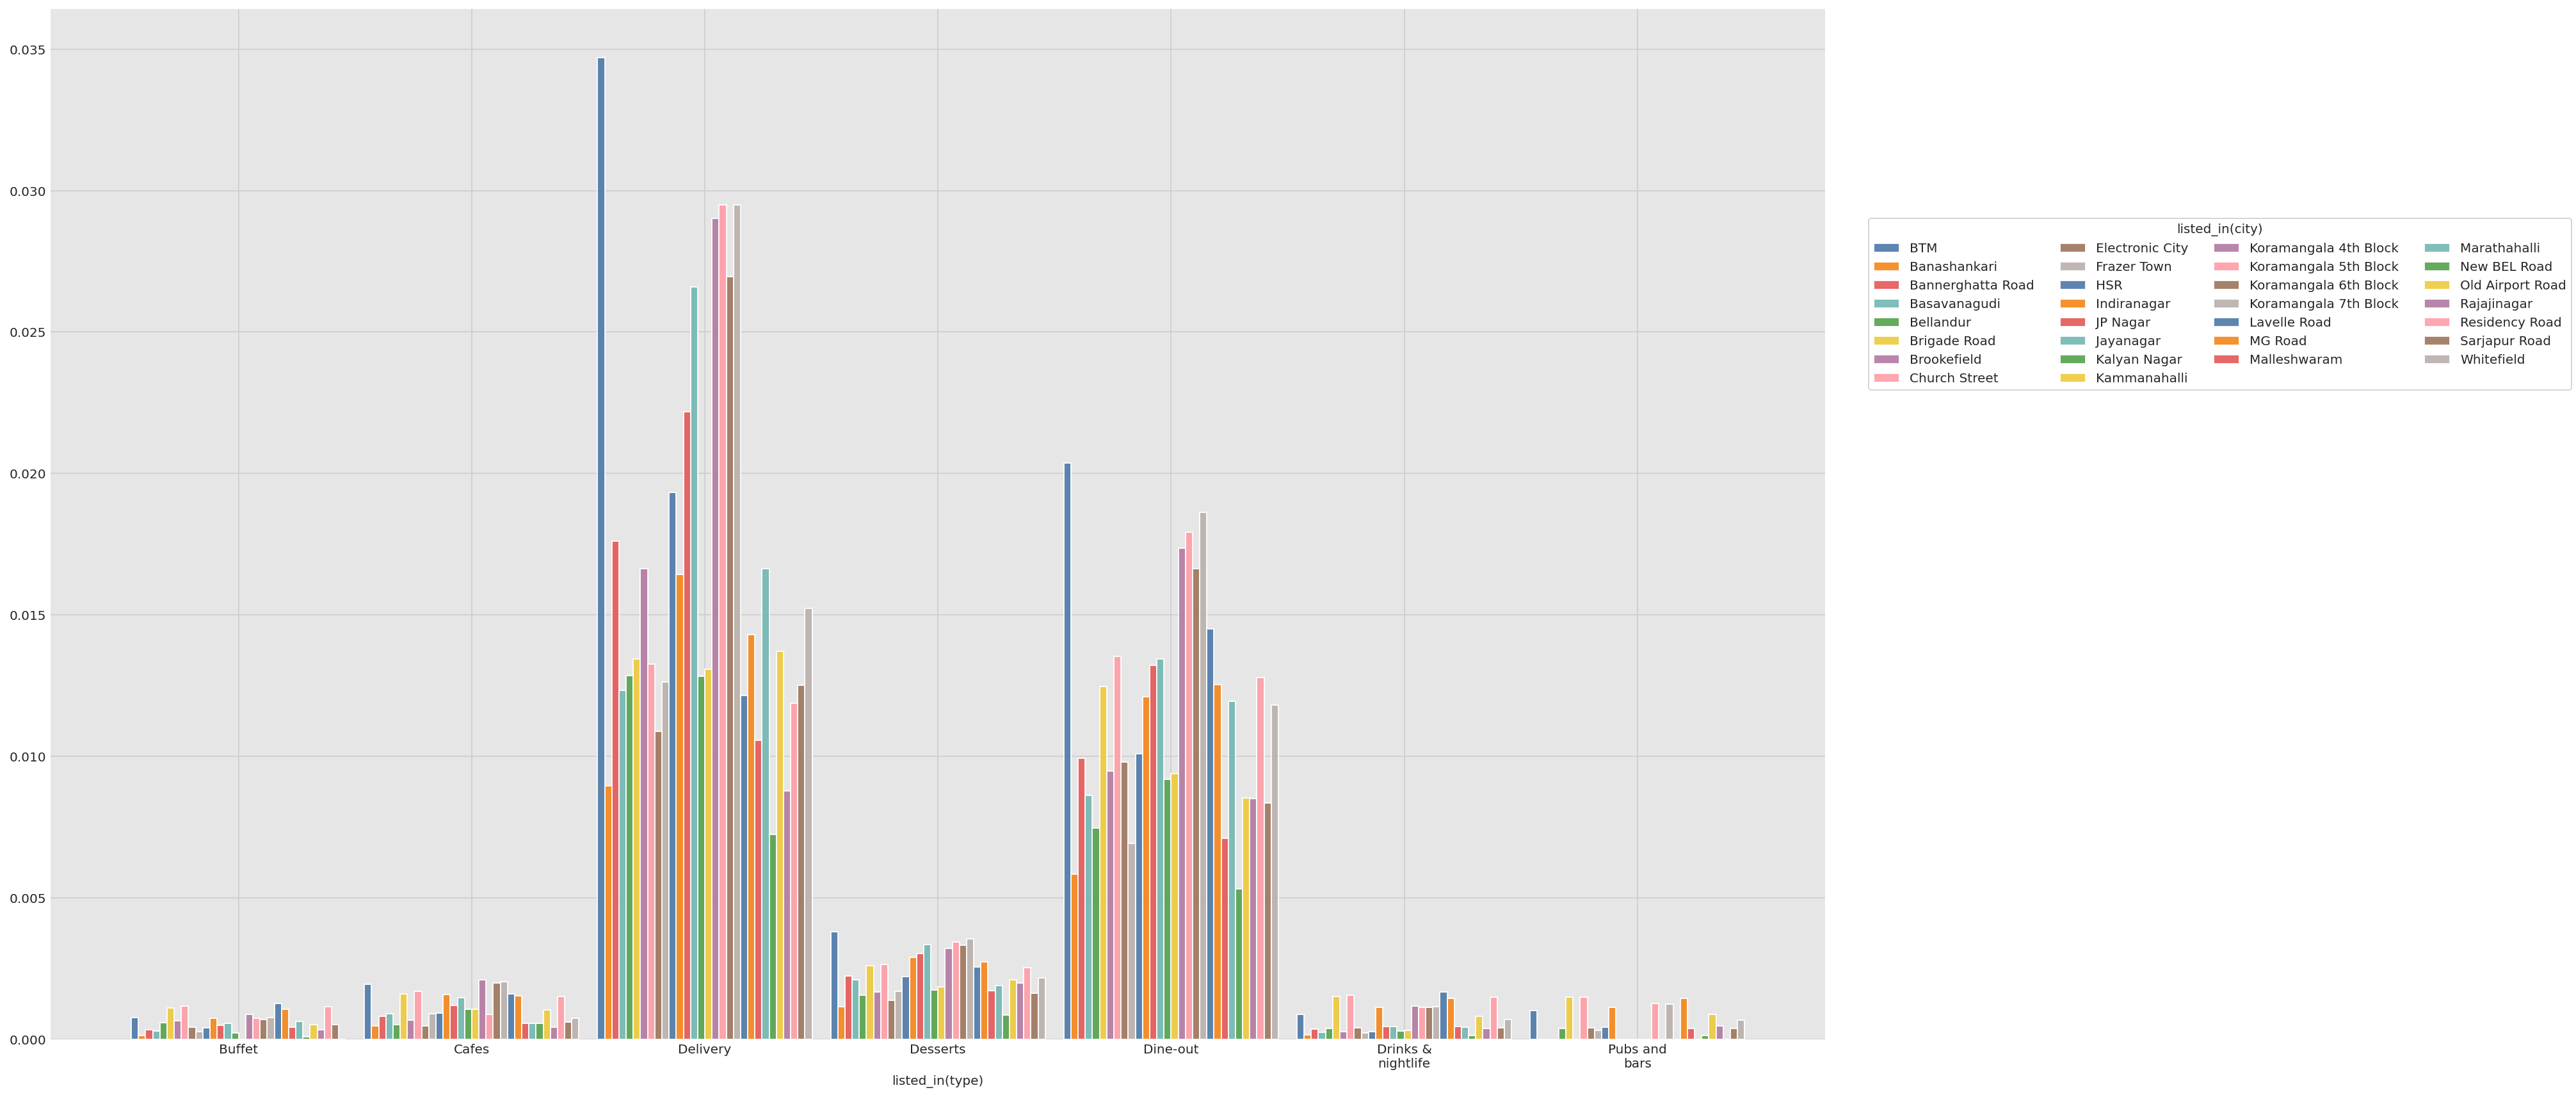

In [42]:
dxp.count(val='listed_in(type)', data=df, figsize=(20,12), split='listed_in(city)', normalize=True)

Above one is the plot of the specific type of meals available in Restaurants of the cities

In [43]:
print(df['rest_type'].nunique())
df['rest_type'].unique()

93


array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

There are 93 different types of Restaurants

Text(0.5, 0, 'Number of Outlets')

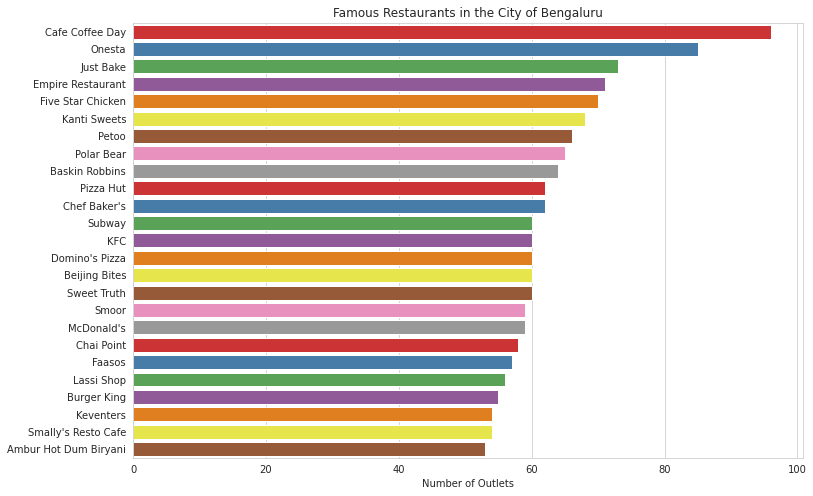

In [44]:
# Plotting for the Top Restuarant in the Bengaluru

plt.figure(figsize=(12,8))
val = df['name'].value_counts()[:25]  # Considering for the top 25 restaurants
sns.barplot(x=val, y=val.index, palette = "Set1")
plt.title("Famous Restaurants in the City of Bengaluru")
plt.xlabel("Number of Outlets")

We know that the Ratings given in the Column Rate are given out of five so instead of writing with /5 extra stuff better to write the rating itself and removing the /5 part

In [45]:
# Lets see how many unique values are there in the rate data
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

We can see from the above that 'NEW' is of the type other than that of float and nan 

In [46]:
# Replacing the "NEW" from the Rate columns to nan values
df.rate = df.rate.replace("NEW", np.nan)
df.dropna(how ='any', inplace = True)

In [47]:
data = df 
data['rate'] = data['rate'].astype(str) # Converting the rating to the String type from the float type first
data['rate'] = data['rate'].apply(lambda x: x.replace('/5',''))
data['rate'] = data['rate'].apply(lambda x: float(x)) # Converting the rating to the Float type from the String type 
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 8 Text major ticklabel objects>)

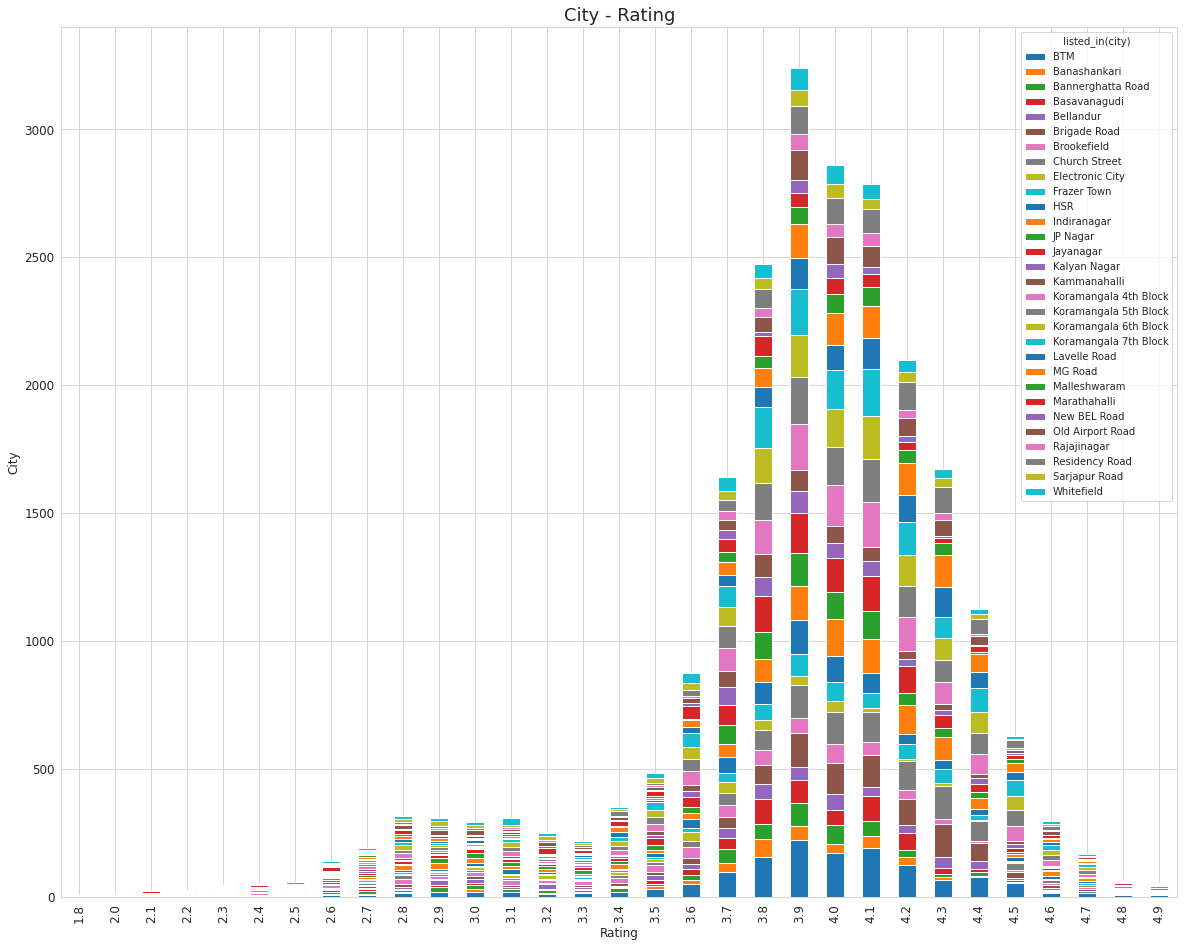

In [48]:
# Lets plot to see that whether there is any relation between the rating of the restaurant 
# and the area in which they are located

rel_type = pd.crosstab(df['rate'], df['listed_in(city)'])
rel_type.plot(kind='bar', stacked=True, figsize=(20,16))
plt.title('City - Rating',fontsize=18)
plt.ylabel('City',fontsize=12)
plt.xlabel('Rating',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



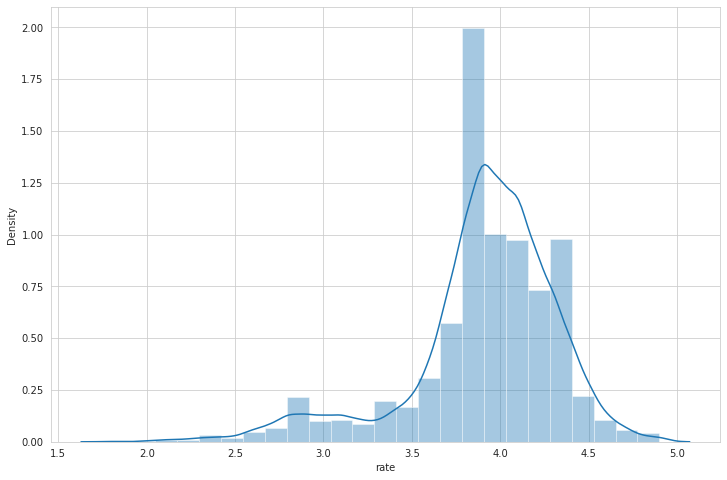

In [49]:
# Rating Distribution

plt.figure(figsize=(12,8))
sns.distplot(df['rate'], bins = 25)

Most of the Hotels have ratings in between 3.7-4.0

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Restaurants delivering online or Not')

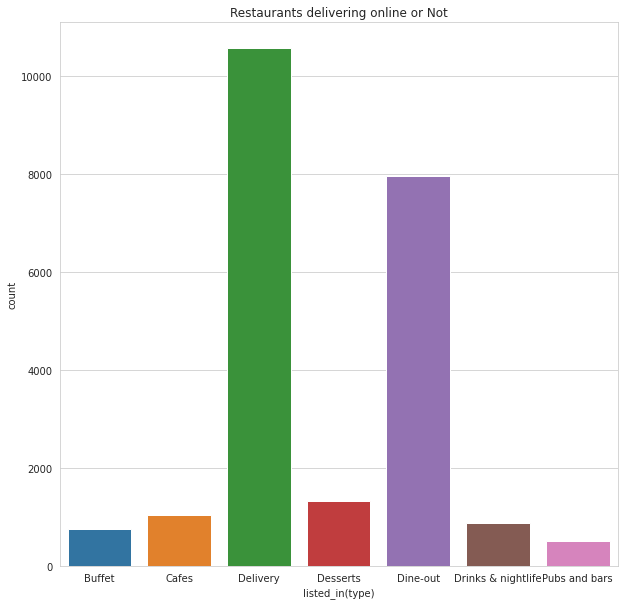

In [50]:
 #meal-type
sns.countplot(df['listed_in(type)'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

Pubs and bars are the least engaged outlets

In [51]:
# Extracting the Location Information Using the Geopy

locations = pd.DataFrame({"Name": df['location'].unique()})
locations.head()

,Name
0,Banashankari
1,Basavanagudi
2,Jayanagar
3,Kumaraswamy Layout
4,Rajarajeshwari Nagar


In [1]:

locations['Name']=locations['Name'].apply(lambda x: "Bangaluru " + str(x)) # here I have used lamda function
# A lambda function is a small anonymous function.
lat_lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)

locations['geo_loc']=lat_lon
locations.to_csv('locations.csv',index=False)

NameError: name 'locations' is not defined

In [53]:
locations["Name"]=locations['Name'].apply(lambda x :  x.replace("Bangaluru","")[1:])
locations.head()

,Name,geo_loc
0,Banashankari,NaN
1,Basavanagudi,"(12.9405198, 77.5794387)"
2,Jayanagar,"(12.9405198, 77.5794387)"
3,Kumaraswamy Layout,NaN
4,Rajarajeshwari Nagar,NaN


In [54]:
# Defining a base map function

def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
  base_map = folium.Map(location = default_location, control_scale=True, zoom_start=default_zoom_start)
  return base_map

In [55]:
### Getting the restaurant count with their name and the locations

Rest_locations = pd.DataFrame(df['location'].value_counts().reset_index())
Rest_locations.columns = ['Name', 'count']
Rest_locations = Rest_locations.merge(locations,on='Name', how="left").dropna()

In [56]:
# Trying to see the rest_location data
Rest_locations

,Name,count,geo_loc
4,Jayanagar,1030,"(12.9405198, 77.5794387)"
13,Church Street,508,"(12.9405198, 77.5794387)"
26,Electronic City,321,"(12.9405198, 77.5794387)"
28,St. Marks Road,304,"(12.9405198, 77.5794387)"
31,Basavanagudi,286,"(12.9405198, 77.5794387)"
34,Old Airport Road,202,"(12.9405198, 77.5794387)"
37,Shanti Nagar,167,"(12.9405198, 77.5794387)"
44,Race Course Road,75,"(12.9405198, 77.5794387)"
62,Hosur Road,24,"(12.9405198, 77.5794387)"
67,South Bangalore,19,"(12.9405198, 77.5794387)"


In [59]:
lat,lon=zip(*np.array(Rest_locations['geo_loc']))
Rest_locations['lat']=lat
Rest_locations['lon']=lon
basemap=generateBaseMap()
HeatMap(Rest_locations[['lat','lon','count']].values.tolist(),radius=15).add_to(basemap)

In [60]:
basemap

- We can observe that restaurants tend to concentrate in central bangalore area.
- As we move away from central,then there is lowering of cluttering of restaurants.
- This can be vital information for the restaurant owner and entrepreneurs


## Heat Map of South Indian Restaurants

```
# This is formatted as code
```



In [61]:
def produce_data(col,name):
    data= pd.DataFrame(df[df[col]==name].groupby(['location'],as_index=False)['url'].agg('count'))
    data.columns=['Name','count']
    print(data.head())
    data=data.merge(locations,on="Name",how='left').dropna()
    data['lan'],data['lon']=zip(*data['geo_loc'].values)
    return data.drop(['geo_loc'],axis=1)


In [62]:
food=produce_data('cuisines','South Indian')
basemap=generateBaseMap()
HeatMap(food[['lan','lon','count']].values.tolist(),radius=15).add_to(basemap)
basemap

                Name  count
0                BTM      6
1       Banashankari     25
2          Banaswadi      9
3  Bannerghatta Road      3
4       Basavanagudi     44


## Heat Map of North Indian Restaurants

In [63]:

food=produce_data('cuisines','North Indian')
basemap=generateBaseMap()
HeatMap(food[['lan','lon','count']].values.tolist(),radius=15).add_to(basemap)
basemap

                Name  count
0                BTM     86
1       Banashankari     10
2          Banaswadi      4
3  Bannerghatta Road     36
4       Basavanagudi     12


- It is Interesting to see that there is cluster of North Indian Restaurants in South Bangalore area !
- This may indicate that these areas are more populated by North Indians.

## Building the Model

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23046 entries, 0 to 51715
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          23046 non-null  object 
 1   address                      23046 non-null  object 
 2   name                         23046 non-null  object 
 3   online_order                 23046 non-null  object 
 4   book_table                   23046 non-null  object 
 5   rate                         23046 non-null  float64
 6   votes                        23046 non-null  int64  
 7   phone                        23046 non-null  object 
 8   location                     23046 non-null  object 
 9   rest_type                    23046 non-null  object 
 10  dish_liked                   23046 non-null  object 
 11  cuisines                     23046 non-null  object 
 12  approx_cost(for two people)  23046 non-null  object 
 13  reviews_list    

In [65]:
# Using the Booleans

df.online_order.replace(('Yes','No'),(True, False),inplace=True)
df.book_table.replace(('Yes','No'),(True, False),inplace=True)

In [66]:
# Defining the Encode Function

def Encode(df):
    for column in df.columns[~df.columns.isin(['rate', 'approx_cost(for two people)', 'votes'])]:
        df[column] = df[column].factorize()[0]
    return df

df_en = Encode(df.copy())

In [67]:
df_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23046 entries, 0 to 51715
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          23046 non-null  int64  
 1   address                      23046 non-null  int64  
 2   name                         23046 non-null  int64  
 3   online_order                 23046 non-null  int64  
 4   book_table                   23046 non-null  int64  
 5   rate                         23046 non-null  float64
 6   votes                        23046 non-null  int64  
 7   phone                        23046 non-null  int64  
 8   location                     23046 non-null  int64  
 9   rest_type                    23046 non-null  int64  
 10  dish_liked                   23046 non-null  int64  
 11  cuisines                     23046 non-null  int64  
 12  approx_cost(for two people)  23046 non-null  object 
 13  reviews_list    

In [70]:
df_en.head(50)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,0,0,0,0,4.1,775,0,0,0,0,0,800,0,0,0,0
1,1,1,1,0,1,4.1,787,1,0,0,1,1,800,1,0,0,0
2,2,2,2,0,1,3.8,918,2,0,1,2,2,800,2,0,0,0
3,3,3,3,1,1,3.7,88,3,0,2,3,3,300,3,0,0,0
4,4,4,4,1,1,3.8,166,4,1,0,4,4,600,4,0,0,0
5,5,5,5,0,1,3.8,286,5,1,0,5,5,600,5,0,0,0
7,6,6,6,0,0,4.6,2556,6,0,3,6,6,600,6,0,1,0
8,7,7,7,0,1,4.0,324,7,0,4,7,7,700,7,0,1,0
9,8,8,8,0,1,4.2,504,8,0,4,8,8,550,8,0,1,0
10,9,9,9,0,1,4.1,402,9,0,4,9,9,500,9,0,1,0


In [71]:
df_en['approx_cost(for two people)'] = df_en['approx_cost(for two people)'].astype(str)
df_en['approx_cost(for two people)'] = df_en['approx_cost(for two people)'].apply(lambda x: x.replace(',','.'))
df_en['approx_cost(for two people)'] = df_en['approx_cost(for two people)'].astype(float)

In [72]:
df_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23046 entries, 0 to 51715
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          23046 non-null  int64  
 1   address                      23046 non-null  int64  
 2   name                         23046 non-null  int64  
 3   online_order                 23046 non-null  int64  
 4   book_table                   23046 non-null  int64  
 5   rate                         23046 non-null  float64
 6   votes                        23046 non-null  int64  
 7   phone                        23046 non-null  int64  
 8   location                     23046 non-null  int64  
 9   rest_type                    23046 non-null  int64  
 10  dish_liked                   23046 non-null  int64  
 11  cuisines                     23046 non-null  int64  
 12  approx_cost(for two people)  23046 non-null  float64
 13  reviews_list    

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

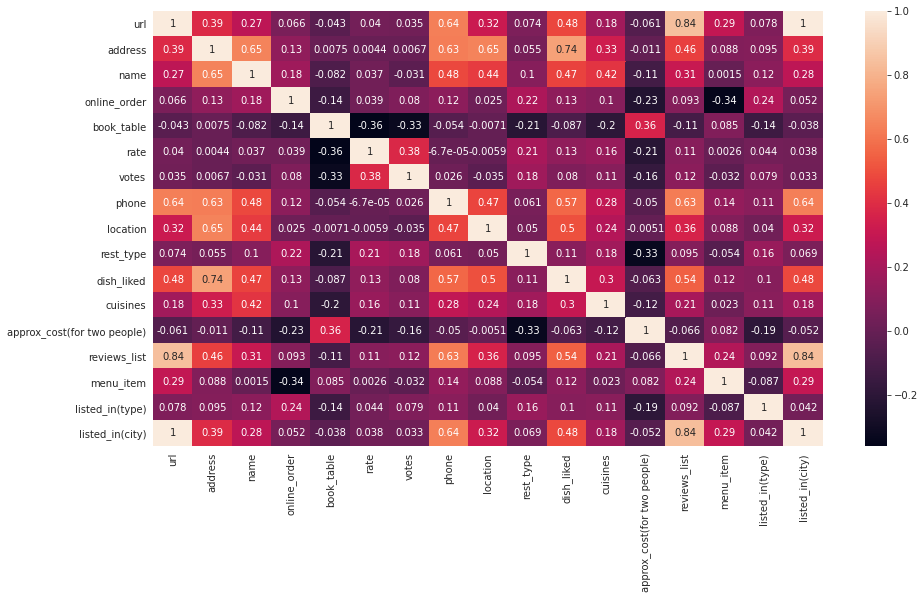

In [73]:
#Get Correlation between different variables
corr = df_en.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df_en.columns

In [74]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
#Defining the independent variables and dependent variables
x=df_en.drop(["rate"], axis=1) #modified
y = df_en['rate']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
x_train.head()

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
49237,22122,934,835,0,1,61,6504,18,2,950,112,250.0,13328,0,2,28
1000,450,320,198,0,0,1428,379,10,0,316,211,800.0,370,138,2,1
32826,14538,2061,1712,0,1,44,4578,44,2,2106,957,550.0,8760,2833,2,18
5047,2066,1042,930,1,1,2635,1204,28,4,1070,9,600.0,1456,0,1,4
32775,14518,2257,1883,0,1,76,2572,13,2,2307,208,600.0,8750,3154,2,18


In [75]:
y_train.head()

49237    3.4
1000     4.2
32826    3.9
5047     4.3
32775    3.5
Name: rate, dtype: float64

In [76]:
x_test.head()

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
26132,11316,3397,1408,0,0,389,4270,66,14,3715,1391,1.3,7029,0,4,15
45814,20516,2823,666,0,0,3307,6165,22,0,4704,1213,1.4,12444,0,4,25
3461,1383,26,27,0,1,5060,829,2,0,712,25,750.0,949,216,4,2
2821,1114,637,585,0,1,157,742,12,0,629,30,450.0,819,0,2,2
2479,911,383,361,0,0,612,667,11,15,376,244,1.5,712,0,5,1


In [77]:
y_test.head()

26132    3.8
45814    4.2
3461     4.4
2821     3.9
2479     4.1
Name: rate, dtype: float64

## Training the Model

### Linear Regression

**LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.**

In [78]:
# Doing the Regression Analysis
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression() # Definig the model
reg_model.fit(x_train, y_train) # Training
y_pred = reg_model.predict(x_test) # Predicting

r2_score(y_test, y_pred) # Calculating the r2_score

0.24195163302380007

CatBoost Regression

**“CatBoost” name comes from two words “Category” and “Boosting”.**

- It yields state-of-the-art results without extensive data training typically required by other machine learning methods, and
-Provides powerful out-of-the-box support for the more descriptive data formats that accompany many business problems.

In [79]:
# Installing the CatBoost

!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

     |████████████████████████████████| 66.1MB 58kB/s 
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [80]:
from catboost import CatBoostRegressor

# Building a catboost regressor model
CBR_model = CatBoostRegressor(
    n_estimators = 200,
    loss_function = 'MAE',
    eval_metric = 'RMSE'
    )
CBR_model.fit(x_train, y_train) # Training
y_predict = CBR_model.predict(x_test) # Predicting
r2_score(y_test,y_predict) #Calculating the r2_score

0:	learn: 0.4345763	total: 57ms	remaining: 11.3s
1:	learn: 0.4315470	total: 66.1ms	remaining: 6.55s
2:	learn: 0.4284493	total: 74.4ms	remaining: 4.88s
3:	learn: 0.4256192	total: 82.4ms	remaining: 4.04s
4:	learn: 0.4231260	total: 90.5ms	remaining: 3.53s
5:	learn: 0.4202486	total: 98.6ms	remaining: 3.19s
6:	learn: 0.4177759	total: 106ms	remaining: 2.93s
7:	learn: 0.4155617	total: 114ms	remaining: 2.73s
8:	learn: 0.4135510	total: 121ms	remaining: 2.58s
9:	learn: 0.4114772	total: 129ms	remaining: 2.45s
10:	learn: 0.4092908	total: 137ms	remaining: 2.35s
11:	learn: 0.4071890	total: 144ms	remaining: 2.26s
12:	learn: 0.4050551	total: 152ms	remaining: 2.18s
13:	learn: 0.4031247	total: 159ms	remaining: 2.11s
14:	learn: 0.4013564	total: 167ms	remaining: 2.06s
15:	learn: 0.3997154	total: 174ms	remaining: 2.01s
16:	learn: 0.3981356	total: 182ms	remaining: 1.96s
17:	learn: 0.3968451	total: 190ms	remaining: 1.92s
18:	learn: 0.3954628	total: 197ms	remaining: 1.88s
19:	learn: 0.3940955	total: 205ms	rem

0.3484836201901148

Random Forest Regression

**Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.**

In [81]:
from sklearn.ensemble import RandomForestRegressor
# Defining the model
RF_model = RandomForestRegressor(n_estimators=600, criterion='mse', max_depth=None
                                 , min_samples_split=2, min_samples_leaf=0.0001, min_weight_fraction_leaf=0.0,
                                 max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
                                 min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
                                 random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
RF_model.fit(x_train, y_train) # Training
y_predict = RF_model.predict(x_test) # Testing
r2_score(y_test, y_predict) # Calculating the r2_score

0.8752816967138799

Decision Tree Regression

**Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.**

In [82]:
from sklearn.tree import DecisionTreeRegressor

# Defining the model
DT_model = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None,
                                 min_samples_split=2, min_samples_leaf=0.00011, min_weight_fraction_leaf=0.0,
                                 max_features=None, random_state=None, max_leaf_nodes=None,
                                 min_impurity_decrease=0.0, min_impurity_split=None,
                                 presort='deprecated', ccp_alpha=0.0)
DT_model.fit(x_train, y_train)  # Training
y_predict = DT_model.predict(x_test) # Testing
r2_score(y_test, y_predict) # Calculating the score

0.7941722578540722

### Conclusion

With the above implementation it was possible to deliver useful information for Business areas and also for Zomato customers on choosing the best restaurant for ordering (specially the new ones). This is an example of what predictive models can do in practice. This project helps us to gain more insights about the restaurant business.